In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("titanic.csv")

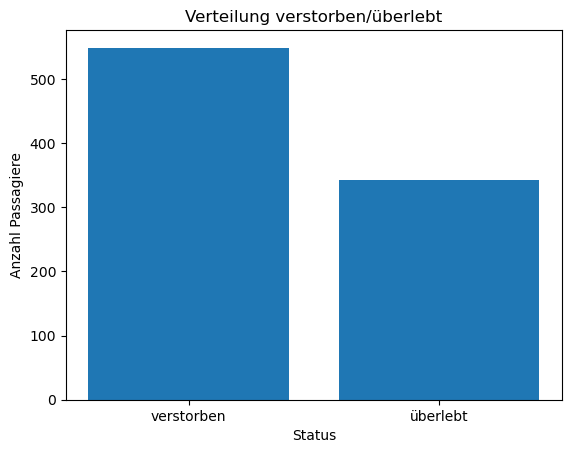

In [2]:
# Verteilung der Passagiere nach überlebt/verstorben
survival_counts = data["Survived"].value_counts()

# Balkendiagramm
plt.bar(["verstorben", "überlebt"], survival_counts)
plt.title("Verteilung verstorben/überlebt")
plt.xlabel("Status")
plt.ylabel("Anzahl Passagiere")
plt.show()


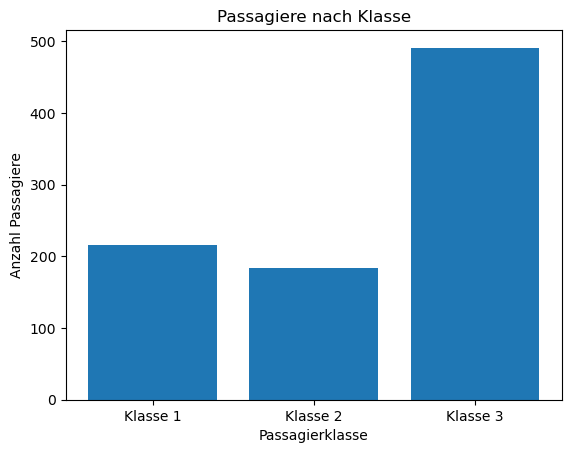

In [3]:
# Verteilung der Passagiere in Klassen
pclass_counts = data["Pclass"].value_counts().sort_index()

# Balkendiagramm
plt.bar(["Klasse 1", "Klasse 2", "Klasse 3"], pclass_counts)
plt.title("Passagiere nach Klasse")
plt.xlabel("Passagierklasse")
plt.ylabel("Anzahl Passagiere")
plt.show()

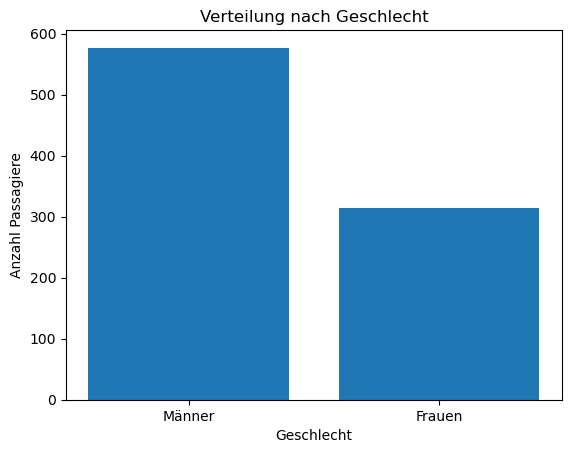

In [4]:
# Verteilung der Passagiere nach Geschlecht
gender_count = data["Sex"].value_counts()

# Balkendiagramm
plt.bar(["Männer", "Frauen"], gender_count)
plt.title("Verteilung nach Geschlecht")
plt.xlabel("Geschlecht")
plt.ylabel("Anzahl Passagiere")
plt.show()


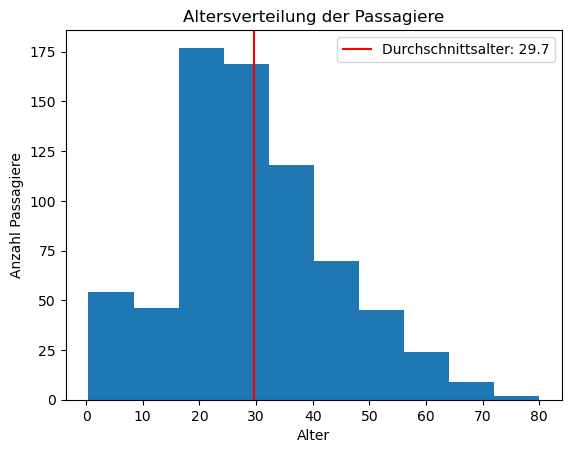

In [5]:
# Verteilung der Passagiere nach Alter
passenger_age = data["Age"].dropna()

median_age = passenger_age.mean()

# Histogramm zeichnen
plt.hist(passenger_age)

# Durchschnittsalter als rote gestrichelte Linie
plt.axvline(median_age, color='red', label=f'Durchschnittsalter: {median_age:.1f}')

# Achsen und Titel setzen
plt.xlabel('Alter')
plt.ylabel('Anzahl Passagiere')
plt.title('Altersverteilung der Passagiere')
plt.legend()

plt.show()

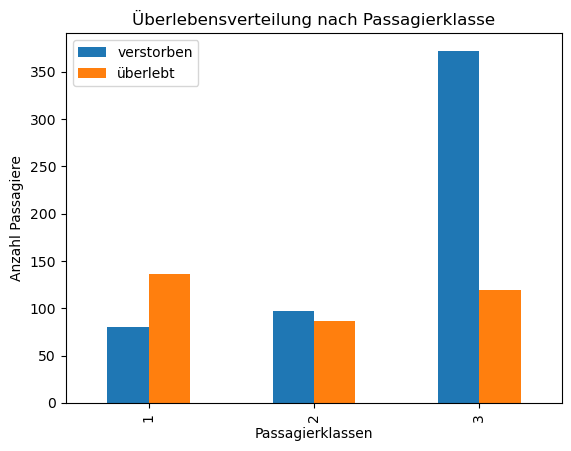

In [6]:
# Überlebensverteilung nach Passagierklasse
survival_by_class = data.groupby(["Pclass", "Survived"]).size().unstack()

# Balkendiagramm zeichnen
survival_by_class.plot(kind="bar", stacked=False)
plt.title("Überlebensverteilung nach Passagierklasse")
plt.xlabel("Passagierklassen")
plt.ylabel("Anzahl Passagiere")
plt.legend(["verstorben", "überlebt"])
plt.show()

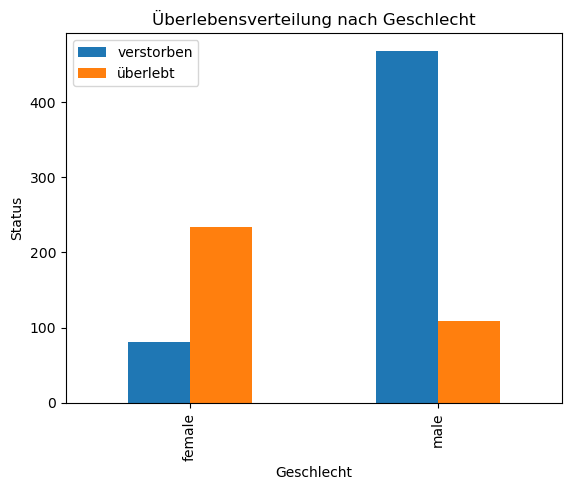

In [7]:
# Überlebensverteilung nach Geschlecht
survival_by_gender = data.groupby(["Sex","Survived"]).size().unstack()

# Balkendiagramm
survival_by_gender.plot(kind="bar", stacked=False)
plt.title("Überlebensverteilung nach Geschlecht")
plt.xlabel("Geschlecht")
plt.ylabel("Status")
plt.legend(["verstorben","überlebt"])
plt.show()

C:\Users\anst_ma\AppData\Local\Temp\ipykernel_16920\6440563.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age = data.groupby(["AgeGroup","Survived"]).size().unstack()


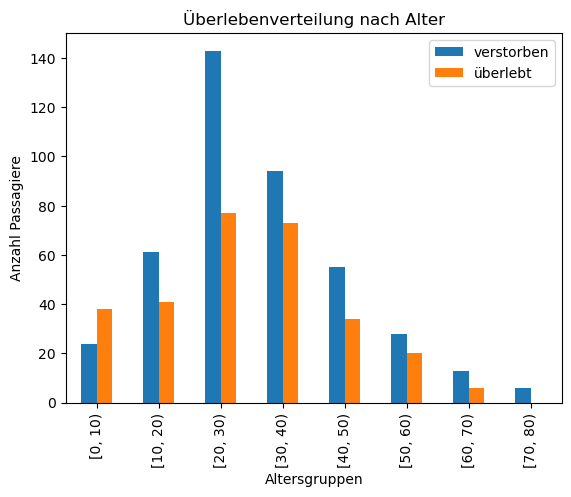

In [8]:
#Einteilung der Passagiere in Altersklassen
data["AgeGroup"] = pd.cut(data["Age"], bins=range(0, 81, 10), right=False)

# Überlebensverteilung nach Alter
survival_by_age = data.groupby(["AgeGroup","Survived"]).size().unstack()

survival_by_age.plot(kind="bar",stacked=False)
plt.title("Überlebenverteilung nach Alter")
plt.xlabel("Altersgruppen")
plt.ylabel("Anzahl Passagiere")
plt.legend(["verstorben","überlebt"])
plt.show()

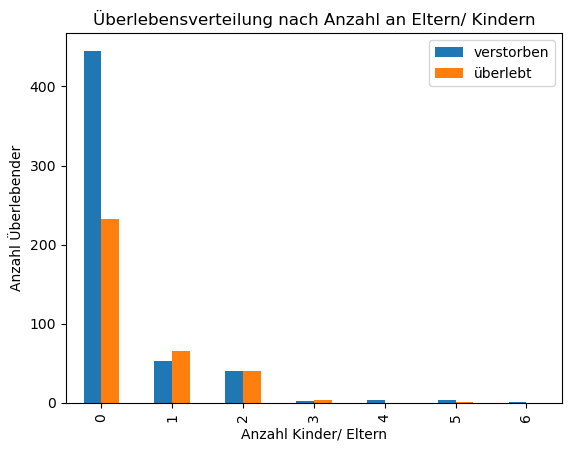

In [9]:
#Überlebensverteilung in Abhängigkeit der Gruppengröße
survival_by_children = data.groupby(["Parch","Survived"]).size().unstack()

# Balkendiagramm
survival_by_children.plot(kind="bar", stacked=False)
plt.title("Überlebensverteilung nach Anzahl an Eltern/ Kindern")
plt.xlabel("Anzahl Kinder/ Eltern")
plt.ylabel("Anzahl Überlebender")
plt.legend(["verstorben","überlebt"])


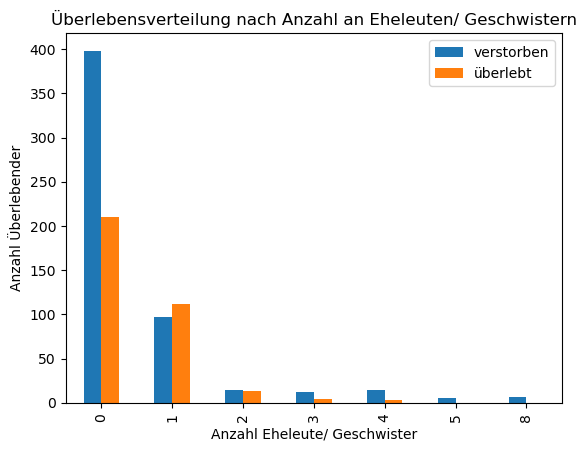

In [10]:
survival_by_siblings = data.groupby(["SibSp","Survived"]).size().unstack()

survival_by_siblings.plot(kind="bar", stacked=False)
plt.title("Überlebensverteilung nach Anzahl an Eheleuten/ Geschwistern")
plt.xlabel("Anzahl Eheleute/ Geschwister")
plt.ylabel("Anzahl Überlebender")
plt.legend(["verstorben","überlebt"])
plt.show()

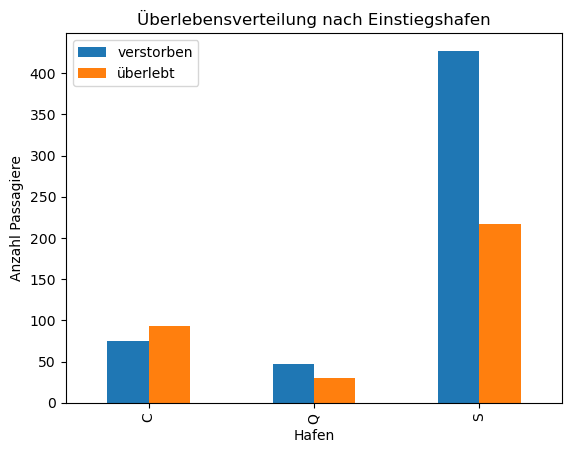

In [11]:
# Überlebensverteilung nach Hafen

survival_embarked = data.groupby(["Embarked","Survived"]).size().unstack()

# Balkendiagramm
survival_embarked.plot(kind="bar",stacked=False)
plt.title("Überlebensverteilung nach Einstiegshafen")
plt.xlabel("Hafen")
plt.ylabel("Anzahl Passagiere")
plt.legend(["verstorben","überlebt"])
plt.show()


In [12]:

# Aufgabenteil A

# - Analyse and visualize the data. Look for missing values and for correlations between features, as well as between feature and target.
# Prepare a brief report with some visualisations of the data, and with a summary of what you observed.
# This can be a jupyter notebok, some other document, or just part of the PR description with images pasted into it.

# Analyse des Titanic Datensatz

# Insgesamt 891 Passagiere davon haben 342 überlebt und 549 sind verstorben
# Verteilung nach Klassen -> 1 Klasse: 216 davon 79 verstorben | Klasse 2: 184 davon 98 verstorben | Klasse 3: 490 davon 372 verstorben
# Verteilung nach Geschlecht -> Frauen: 313 davon gestorben 80 | Männer: 577 davon gestorben 465
# Verteilung nach Alter Spanne von 0.42 bis 80 und 190 Alter unbekannt -> Überlebenschance bei Kinder prozentual am höchsten; Totale Überlebenschance zwischen 20-30 am höchsten 
# Größere Gruppen haben schlechtere Überlebenschance
# Ticket Nummer keine aussagekräftige Relevanz für Überlebenschance
# Ticketpreis stimmt mit Verteilung der Klassen überein
# Kabinennummer nur 204 bekannt -> geringe Aussagekraft
# Zustiegshafen nicht von Relevanz -> Hafen C: viele Passagiere in Klasse 1 | Hafen S: meisten Passagiere in Klasse 3

# Target: Überlebensverteilung
# Feature Zusammenhänge: Klasse, Alter, Geschlecht 
# Zusammenhänge zwischen Features: Überschenidung zwischen Klasse, Ticketpreis und Cabin



In [13]:
# Aufgabenteil B

# - Train an ML model that will predict for any passenger whether they will survive. Determine whether this is a classification or regression task, and use an 
# appropriate model. Spend some time on optimizing the algorithm and hyperparameters. Report the matthews correlation coefficient calculated on a test set as 
# part of your submission.

In [14]:
from sklearn.model_selection import train_test_split

# Zuordnung der Features/ Target

x = data[["Pclass","Age","SibSp","Parch","Fare"]]
y = data[["Survived"]]

x["Age"].fillna(median_age, inplace=True)
#Aufteilung in Test und Trainings Daten
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

C:\Users\anst_ma\AppData\Local\Temp\ipykernel_16920\3222138660.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Age"].fillna(median_age, inplace=True)


In [15]:
x_train.head()

,Pclass,Age,SibSp,Parch,Fare
734,3,20.000000,0,0,8.0500
468,2,54.000000,1,0,26.0000
700,3,29.699118,0,0,8.0500
371,3,29.000000,1,1,10.4625
439,1,29.699118,0,0,31.0000


In [16]:
y_train.head()

,Survived
734,0
468,0
700,0
371,0
439,0


In [17]:
x_test.head()

,Pclass,Age,SibSp,Parch,Fare
587,2,39.000000,0,0,13.0000
233,3,29.699118,0,0,7.7375
849,3,25.000000,0,0,7.2500
77,1,29.699118,0,0,79.2000
545,3,29.699118,1,0,16.1000


In [18]:
y_test.head()

,Survived
587,0
233,1
849,0
77,1
545,1


In [19]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([110,  69]))

In [ ]:
# Klassifikation, weil die Daten in eine von zwei Gruppen eingeordnet werden sollen und nicht in einen Wert zugeorndet werden sollen

from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier

classifier =GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3).fit(x_train, y_train)

c:\ProgramData\mambaforge_24.3.0.0\envs\ppp\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1])

In [22]:
y_pred = pd.DataFrame(y_pred, columns=['prediction'], index=y_test.index)

In [23]:
results = pd.concat([y_test, y_pred], axis=1)
results['correct'] = results.Survived == results.prediction
results.head()

,Survived,prediction,correct
587,0,0,True
233,1,0,False
849,0,0,True
77,1,1,True
545,1,0,False


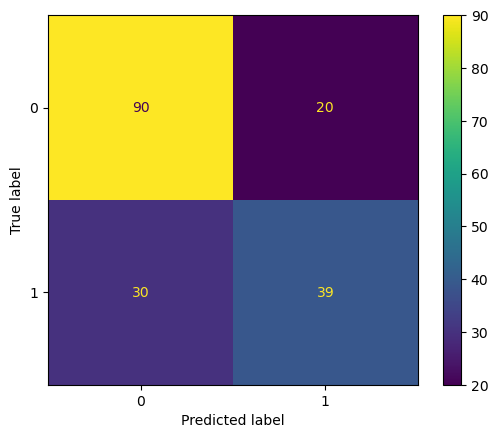

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(classifier, x_test, y_test)

In [25]:
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef

accuracy_score(y_test, y_pred)

0.7206703910614525

In [26]:
f1_score(y_test, y_pred, average='macro')

0.6959918478260869

In [27]:
matthews_corrcoef(y_test, y_pred)

0.3969679752706765